In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
pd.read_csv('zippedData/bom.movie_gross.csv.gz')

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [120]:
imdb_title = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdb_title

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [121]:
imdb_rate = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
imdb_rate

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [122]:
imdb_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [123]:
imdb_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [124]:
imdb_rate.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [125]:
imdb_title.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [126]:
imdb_title.dropna(subset=['genres', 'runtime_minutes'], inplace= True)

In [127]:
imdb_title.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112233 entries, 0 to 146139
Data columns (total 6 columns):
tconst             112233 non-null object
primary_title      112233 non-null object
original_title     112232 non-null object
start_year         112233 non-null int64
runtime_minutes    112233 non-null float64
genres             112233 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.0+ MB


In [128]:
imdb_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [129]:
new_imdb = pd.merge(imdb_rate,
                    imdb_title, on='tconst')

In [130]:
new_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65720 entries, 0 to 65719
Data columns (total 8 columns):
tconst             65720 non-null object
averagerating      65720 non-null float64
numvotes           65720 non-null int64
primary_title      65720 non-null object
original_title     65720 non-null object
start_year         65720 non-null int64
runtime_minutes    65720 non-null float64
genres             65720 non-null object
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [131]:
new_imdb

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
65715,tt9768966,8.6,27,Plugged in,Plugged in,2019,53.0,Documentary
65716,tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
65717,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
65718,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary


In [132]:
new_imdb

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
65715,tt9768966,8.6,27,Plugged in,Plugged in,2019,53.0,Documentary
65716,tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
65717,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
65718,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary


In [133]:
del new_imdb['start_year']

In [136]:
new_imdb['rating*numvotes']=new_imdb['averagerating']*new_imdb['numvotes']
new_imdb

,tconst,averagerating,numvotes,primary_title,original_title,runtime_minutes,genres,rating*numvotes
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,117.0,Romance,257.3
1,tt10384606,8.9,559,Borderless,Borderless,87.0,Documentary,4975.1
2,tt1042974,6.4,20,Just Inès,Just Inès,90.0,Drama,128.0
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,99.0,"Action,Adventure,Fantasy",211478.4
4,tt1060240,6.5,21,Até Onde?,Até Onde?,73.0,"Mystery,Thriller",136.5
...,...,...,...,...,...,...,...,...
65715,tt9768966,8.6,27,Plugged in,Plugged in,53.0,Documentary,232.2
65716,tt9805820,8.1,25,Caisa,Caisa,84.0,Documentary,202.5
65717,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,120.0,"Action,Animation,Sci-Fi",180.0
65718,tt9886934,7.0,5,The Projectionist,The Projectionist,81.0,Documentary,35.0


In [100]:
new_imdb['genres']

0                         Romance
1                     Documentary
2                           Drama
3        Action,Adventure,Fantasy
4                Mystery,Thriller
                   ...           
65715                 Documentary
65716                 Documentary
65717     Action,Animation,Sci-Fi
65718                 Documentary
65719                    Thriller
Name: genres, Length: 65720, dtype: object

In [101]:
new_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65720 entries, 0 to 65719
Data columns (total 4 columns):
tconst             65720 non-null object
averagerating      65720 non-null float64
runtime_minutes    65720 non-null float64
genres             65720 non-null object
dtypes: float64(2), object(2)
memory usage: 5.0+ MB


In [102]:
type(new_imdb['genres'])

pandas.core.series.Series

In [103]:
type(new_imdb)

pandas.core.frame.DataFrame

In [168]:
top_10_genres = new_imdb['genres'].value_counts()[:10]
top_10_genres

Drama                   10189
Documentary              9149
Comedy                   4604
Comedy,Drama             2451
Horror                   2232
Drama,Romance            1392
Thriller                 1288
Comedy,Drama,Romance     1159
Comedy,Romance           1128
Horror,Thriller           943
Name: genres, dtype: int64

In [160]:
top_20_genres = new_imdb['genres'].value_counts()[:20]

In [161]:
top_20_genres


Drama                            10189
Documentary                       9149
Comedy                            4604
Comedy,Drama                      2451
Horror                            2232
Drama,Romance                     1392
Thriller                          1288
Comedy,Drama,Romance              1159
Comedy,Romance                    1128
Horror,Thriller                    943
Drama,Thriller                     938
Action                             721
Biography,Documentary              675
Documentary,Drama                  572
Documentary,Music                  544
Action,Crime,Drama                 530
Romance                            529
Comedy,Horror                      515
Crime,Drama,Thriller               493
Biography,Documentary,History      476
Name: genres, dtype: int64

In [108]:
new_rating = new_imdb['averagerating'].value_counts()

In [109]:
new_rating

7.0     2046
6.5     2034
6.6     2032
7.2     2012
6.8     1997
        ... 
9.6       15
10.0      13
9.7       11
9.8       11
9.9        5
Name: averagerating, Length: 91, dtype: int64

In [162]:
new_imdb

,tconst,averagerating,numvotes,primary_title,original_title,runtime_minutes,genres,rating*numvotes
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,117.0,Romance,257.3
1,tt10384606,8.9,559,Borderless,Borderless,87.0,Documentary,4975.1
2,tt1042974,6.4,20,Just Inès,Just Inès,90.0,Drama,128.0
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,99.0,"Action,Adventure,Fantasy",211478.4
4,tt1060240,6.5,21,Até Onde?,Até Onde?,73.0,"Mystery,Thriller",136.5
...,...,...,...,...,...,...,...,...
65715,tt9768966,8.6,27,Plugged in,Plugged in,53.0,Documentary,232.2
65716,tt9805820,8.1,25,Caisa,Caisa,84.0,Documentary,202.5
65717,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,120.0,"Action,Animation,Sci-Fi",180.0
65718,tt9886934,7.0,5,The Projectionist,The Projectionist,81.0,Documentary,35.0


In [174]:
top10_list = list(top_10_genres.keys())
top10_list

['Drama',
 'Documentary',
 'Comedy',
 'Comedy,Drama',
 'Horror',
 'Drama,Romance',
 'Thriller',
 'Comedy,Drama,Romance',
 'Comedy,Romance',
 'Horror,Thriller']

In [113]:
#new_imdb[new_imdb['genres']=='Drama']['averagerating'].mean()

6.485778781038375

In [149]:
new_imdb_drama = new_imdb[new_imdb['genres']=='Drama']
new_imdb_drama

,tconst,averagerating,numvotes,primary_title,original_title,runtime_minutes,genres,rating*numvotes
2,tt1042974,6.4,20,Just Inès,Just Inès,90.0,Drama,128.0
36,tt1325019,7.2,29,The Custom Mary,The Custom Mary,81.0,Drama,208.8
46,tt1368858,5.4,4302,The Forger,The Forger,94.0,Drama,23230.8
50,tt1379736,5.7,15,Cesado,Cesado,90.0,Drama,85.5
58,tt1418760,6.4,1502,Tirza,Tirza,100.0,Drama,9612.8
...,...,...,...,...,...,...,...,...
65684,tt9109492,6.4,9,American Woman,American Woman,85.0,Drama,57.6
65689,tt9165332,7.4,710,Chitralahari,Chitralahari,131.0,Drama,5254.0
65702,tt9471952,7.1,338,Sükut Evi,Sükut Evi,97.0,Drama,2399.8
65709,tt9619016,7.0,27,Fukuoka,Fukuoka,88.0,Drama,189.0


In [152]:
drama_average = sum_rate_nvots / sum_votes
drama_average

7.151290148962464

In [177]:
new_imdb_Documentary = new_imdb[new_imdb['genres']=='Documentary']
new_imdb_Documentary

,tconst,averagerating,numvotes,primary_title,original_title,runtime_minutes,genres,rating*numvotes
1,tt10384606,8.9,559,Borderless,Borderless,87.0,Documentary,4975.1
31,tt1287879,7.7,76,America Stripped,Stripped: Greg Friedler's Naked Las Vegas,78.0,Documentary,585.2
43,tt1346690,7.7,7,Music Makes a City: A Louisville Orchestra Story,Music Makes a City: A Louisville Orchestra Story,103.0,Documentary,53.9
49,tt1378667,7.5,31,Florent: Queen of the Meat Market,Florent: Queen of the Meat Market,87.0,Documentary,232.5
56,tt1409015,8.2,40,Greenlit,Greenlit,50.0,Documentary,328.0
...,...,...,...,...,...,...,...,...
65708,tt9613538,4.3,26,Mad House: A Paranormal Documentary,Mad House: A Paranormal Documentary,89.0,Documentary,111.8
65713,tt9691896,6.3,21,Out,Coming Out,64.0,Documentary,132.3
65715,tt9768966,8.6,27,Plugged in,Plugged in,53.0,Documentary,232.2
65716,tt9805820,8.1,25,Caisa,Caisa,84.0,Documentary,202.5


In [182]:
documentry_average = sum_rate_nvots_doc / sum_votes_doc
documentry_average

7.1896575086520125

In [183]:
new_imdb_Comedy = new_imdb[new_imdb['genres']=='Comedy']
new_imdb_Comedy

,tconst,averagerating,numvotes,primary_title,original_title,runtime_minutes,genres,rating*numvotes
10,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,96.0,Comedy,42309.6
28,tt1274297,5.4,381,Weddings and Other Disasters,Matrimoni e altri disastri,102.0,Comedy,2057.4
41,tt1343110,2.5,345,Speed-Dating,Speed-Dating,98.0,Comedy,862.5
105,tt1539491,5.6,55,Bale Pandiya,Bale Pandiya,137.0,Comedy,308.0
132,tt1595379,7.4,14,The Lutefisk Wars,The Lutefisk Wars,86.0,Comedy,103.6
...,...,...,...,...,...,...,...,...
65687,tt9127488,9.3,10,Postal,Postal,77.0,Comedy,93.0
65692,tt9185542,6.7,78,An Almost Ordinary Summer,Croce e delizia,100.0,Comedy,522.6
65695,tt9260446,6.3,137,Ma cosa ci dice il cervello,Ma cosa ci dice il cervello,100.0,Comedy,863.1
65699,tt9443892,2.3,6,Degistir Bakalim,Degistir Bakalim,103.0,Comedy,13.8


In [186]:
comedy_average = sum_rate_nvots_comedy / sum_votes_comedy
comedy_average

5.876412804857133

In [187]:
new_imdb_Comdrama = new_imdb[new_imdb['genres']=='Comedy,Drama']
new_imdb_Comdrama

,tconst,averagerating,numvotes,primary_title,original_title,runtime_minutes,genres,rating*numvotes
45,tt1360829,5.0,223,The Shouting Men,The Shouting Men,92.0,"Comedy,Drama",1115.0
62,tt1428464,6.4,227,The Way to Live,Wie man leben soll,100.0,"Comedy,Drama",1452.8
78,tt1492849,5.2,534,Garbage,Garbage,88.0,"Comedy,Drama",2776.8
144,tt1612608,5.8,1360,The Italian,L'Italien,102.0,"Comedy,Drama",7888.0
147,tt1615840,6.6,578,Sinyora Enrica ile Italyan Olmak,Sinyora Enrica ile Italyan Olmak,110.0,"Comedy,Drama",3814.8
...,...,...,...,...,...,...,...,...
65520,tt7385812,7.9,15,Closure,Closure,90.0,"Comedy,Drama",118.5
65593,tt7968500,5.8,77,Jarugandi,Jarugandi,136.0,"Comedy,Drama",446.6
65603,tt8041276,7.2,5947,Paddleton,Paddleton,89.0,"Comedy,Drama",42818.4
65640,tt8426964,4.8,354,Drama,Drama,146.0,"Comedy,Drama",1699.2


In [191]:
comdrama_average = sum_rate_nvots_comdrama / sum_votes_comdrama
comdrama_average

6.874919375845003

In [192]:
new_imdb_Horror = new_imdb[new_imdb['genres']=='Horror']
new_imdb_Horror

,tconst,averagerating,numvotes,primary_title,original_title,runtime_minutes,genres,rating*numvotes
30,tt1285219,3.4,387,Ghosts Don't Exist,Ghosts Don't Exist,99.0,Horror,1315.8
158,tt1630607,3.5,210,Nostrum,Nostrum,79.0,Horror,735.0
165,tt1642248,5.6,64,Killer Ink,Killer Ink,92.0,Horror,358.4
226,tt1728217,4.6,668,Tomie: Unlimited,Tomie: Anrimiteddo,85.0,Horror,3072.8
245,tt1753471,5.6,55,Backstabber,Backstabber,90.0,Horror,308.0
...,...,...,...,...,...,...,...,...
65601,tt8025310,4.5,229,The Odds,The Odds,107.0,Horror,1030.5
65627,tt8236214,3.2,142,Slasher Party,Slasher Party,80.0,Horror,454.4
65650,tt8517144,7.3,258,Kafir: Bersekutu dengan Setan,Kafir: Bersekutu dengan Setan,97.0,Horror,1883.4
65682,tt9097546,3.5,72,Happy Birthday Hannah,Happy Birthday Hannah,81.0,Horror,252.0


In [196]:
Horror_average = sum_rate_nvots_Horror / sum_votes_Horror
Horror_average

5.4570464043149745

In [197]:
new_imdb_DramaRomance = new_imdb[new_imdb['genres']=='Drama,Romance']
new_imdb_DramaRomance

,tconst,averagerating,numvotes,primary_title,original_title,runtime_minutes,genres,rating*numvotes
53,tt1403981,7.1,129443,Remember Me,Remember Me,113.0,"Drama,Romance",919045.3
131,tt1593726,5.8,44,Love in Perth,Love in Perth,90.0,"Drama,Romance",255.2
201,tt1695793,5.8,395,Love U... Mr. Kalakaar!,Love U... Mr. Kalakaar!,152.0,"Drama,Romance",2291.0
216,tt1717736,7.2,8,Vinyl,Vinyl,80.0,"Drama,Romance",57.6
284,tt1789077,6.5,17,The Space Between,The Space Between,85.0,"Drama,Romance",110.5
...,...,...,...,...,...,...,...,...
65572,tt7736536,4.9,120,All of You,All of You,103.0,"Drama,Romance",588.0
65644,tt8439854,6.6,7691,Lust Stories,Lust Stories,120.0,"Drama,Romance",50760.6
65661,tt8804688,8.2,18,Connect,Connect,104.0,"Drama,Romance",147.6
65676,tt9035872,9.0,10,Just One More Kiss,Just One More Kiss,100.0,"Drama,Romance",90.0


In [200]:
DramaRomance = sum_rate_nvots_DramaRomance / sum_votes_DramaRomance
DramaRomance

6.996038813127908

In [201]:
new_imdb_Thriller = new_imdb[new_imdb['genres']=='Thriller']
new_imdb_Thriller

,tconst,averagerating,numvotes,primary_title,original_title,runtime_minutes,genres,rating*numvotes
13,tt1199588,5.5,74,Black Widow,Black Widow,75.0,Thriller,407.0
71,tt1467290,6.3,173,Retornos,Retornos,88.0,Thriller,1089.9
81,tt1510989,3.9,83,Paranormal Abduction,Paranormal Abduction,83.0,Thriller,323.7
323,tt6547822,3.7,26,Bloody Murder,Bloody Murder,70.0,Thriller,96.2
413,tt7274816,3.7,7,Ashley,Ashley,103.0,Thriller,25.9
...,...,...,...,...,...,...,...,...
65578,tt7797658,7.9,2138,Awe!,Awe!,150.0,Thriller,16890.2
65592,tt7954000,5.3,71,The Neighborhood Watch,The Neighborhood Watch,87.0,Thriller,376.3
65594,tt7972178,6.3,128,70 Big Ones,70 Binladens,100.0,Thriller,806.4
65675,tt9010900,7.9,13,Boi,Boi,111.0,Thriller,102.7


In [204]:
Thriller = sum_rate_nvots_Thriller / sum_votes_Thriller
Thriller

5.665143430188661

In [206]:
new_imdb_ComedyDramaRomance = new_imdb[new_imdb['genres']=='Comedy,Drama,Romance']
new_imdb_ComedyDramaRomance

,tconst,averagerating,numvotes,primary_title,original_title,runtime_minutes,genres,rating*numvotes
11,tt1174693,5.8,2381,The Four-Faced Liar,The Four-Faced Liar,87.0,"Comedy,Drama,Romance",13809.8
20,tt1243974,5.4,54646,Aloha,Aloha,105.0,"Comedy,Drama,Romance",295088.4
23,tt1261945,4.4,69199,Sex and the City 2,Sex and the City 2,146.0,"Comedy,Drama,Romance",304475.6
95,tt1528274,7.8,11,Brainwashed Love,Brainwashed Love,90.0,"Comedy,Drama,Romance",85.8
149,tt1618467,7.5,84,Booked Out,Booked Out,86.0,"Comedy,Drama,Romance",630.0
...,...,...,...,...,...,...,...,...
65239,tt3215486,4.5,324,Idhu Kathirvelan Kadhal,Idhu Kathirvelan Kadhal,156.0,"Comedy,Drama,Romance",1458.0
65255,tt3269024,8.5,6,Closet Space: The Movie,Closet Space: The Movie,105.0,"Comedy,Drama,Romance",51.0
65509,tt7313518,5.1,263,Growing Up,Hacerse mayor y otros problemas,96.0,"Comedy,Drama,Romance",1341.3
65586,tt7917484,5.2,124,Write When You Get Work,Write When You Get Work,99.0,"Comedy,Drama,Romance",644.8


In [212]:
ComedyDramaRomance = sum_rate_nvots_ComedyDramaRomance / sum_votes_ComedyDramaRomance
ComedyDramaRomance

6.820128238155679

In [213]:
new_imdb_ComedyRomance = new_imdb[new_imdb['genres']=='Comedy,Romance']
new_imdb_ComedyRomance

,tconst,averagerating,numvotes,primary_title,original_title,runtime_minutes,genres,rating*numvotes
5,tt1069246,6.2,326,Habana Eva,Habana Eva,106.0,"Comedy,Romance",2021.2
34,tt1322312,6.3,54421,Going the Distance,Going the Distance,102.0,"Comedy,Romance",342852.3
101,tt1538545,5.8,821,Zot van A.,Zot van A.,120.0,"Comedy,Romance",4761.8
222,tt1725995,7.6,2309,Hello Stranger,Kuan meun ho,130.0,"Comedy,Romance",17548.4
292,tt1797449,6.1,878,My First Wedding,Mi primera boda,102.0,"Comedy,Romance",5355.8
...,...,...,...,...,...,...,...,...
65434,tt3779140,4.2,49,El desafío,El desafío,90.0,"Comedy,Romance",205.8
65496,tt7201558,5.2,150,Narzeczony na niby,Narzeczony na niby,110.0,"Comedy,Romance",780.0
65514,tt7359786,7.3,45,Metal Heart,Metal Heart,90.0,"Comedy,Romance",328.5
65581,tt7850980,5.3,322,Gajinikanth,Gajinikanth,138.0,"Comedy,Romance",1706.6


In [216]:
ComedyRomance = sum_rate_nvots_ComedyRomance / sum_votes_ComedyRomance
ComedyRomance

6.145059943406289

In [219]:
new_imdb_HorrorThriller = new_imdb[new_imdb['genres']=='Horror,Thriller']
new_imdb_HorrorThriller

,tconst,averagerating,numvotes,primary_title,original_title,runtime_minutes,genres,rating*numvotes
52,tt1400515,3.5,1701,Don't Let Him In,Don't Let Him In,80.0,"Horror,Thriller",5953.5
114,tt1563121,3.7,40,Closets,Closets,91.0,"Horror,Thriller",148.0
134,tt1600197,3.0,349,Behind Your Eyes,Behind Your Eyes,85.0,"Horror,Thriller",1047.0
135,tt1603379,3.5,102,Shackled,Shackled,82.0,"Horror,Thriller",357.0
163,tt1640219,2.8,114,Locked in a Room,Locked in a Room,112.0,"Horror,Thriller",319.2
...,...,...,...,...,...,...,...,...
65308,tt3449320,5.0,856,Darr @ the Mall,Darr @ the Mall,124.0,"Horror,Thriller",4280.0
65391,tt3665768,6.4,41,The Dark Shack,The Dark Shack,90.0,"Horror,Thriller",262.4
65486,tt7153418,7.9,150,Kataka,Kataka,107.0,"Horror,Thriller",1185.0
65510,tt7315484,5.2,22399,The Silence,The Silence,90.0,"Horror,Thriller",116474.8


In [222]:
HorrorThriller = sum_rate_nvots_HorrorThriller / sum_votes_HorrorThriller
HorrorThriller

5.9659309416118225

In [259]:
genres_with_numberofvote = dict({'Drama': 7.15,
 'Documentary':7.18 ,
 'Comedy': 5.87,
 'Comedy,Drama': 6.87,
 'Horror': 5.45,
 'Drama,Romance': 6.99,
 'Thriller': 5.66,
 'Comedy,Drama,Romance': 6.82 ,
 'Comedy,Romance': 6.14,
 'Horror,Thriller': 5.96})

In [260]:

#sort_genres_dict = sorted(genres_dict.items(), key=lambda x: x[1], reverse=True)

#for i in sort_genres_dict:
    #print(i[0], i[1])

In [261]:
genres_with_numberofvote

{'Drama': 7.15,
 'Documentary': 7.18,
 'Comedy': 5.87,
 'Comedy,Drama': 6.87,
 'Horror': 5.45,
 'Drama,Romance': 6.99,
 'Thriller': 5.66,
 'Comedy,Drama,Romance': 6.82,
 'Comedy,Romance': 6.14,
 'Horror,Thriller': 5.96}

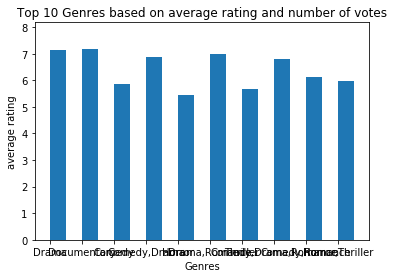

In [273]:
d = genres_with_numberofvote
X = np.arange(len(d))
plt.bar(X, d.values(), align='edge', width=0.5)
plt.xticks(X, d.keys())
ymax = max(d.values()) + 1
sns.barplot('', y="Salary", data=df, 
            order=df.sort_values('Salary',ascending = False).Education)
plt.ylim(0, ymax)
plt.xlabel('Genres')
plt.title('Top 10 Genres based on average rating and number of votes')
plt.ylabel('average rating' )
#plt.savefig("~/Desktop/myplot.png", dpi=150)
plt.show()

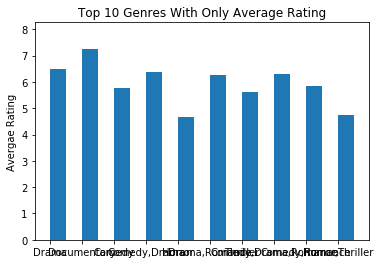

In [266]:
d = average_rate_only
X = np.arange(len(d))
plt.bar(X, d.values(), align='edge', width=0.5)
plt.xticks(X, d.keys())
ymax = max(d.values()) + 1
plt.ylim(0, ymax)
plt.title('Top 10 Genres With Only Average Rating')
plt.ylabel('Avergae Rating' )
#plt.savefig("~/Desktop/myplot.png", dpi=150)
plt.show()

In [235]:
number_of_votes = dict({'Drama': 8342370,
 'Documentary': 1760862,
 'Comedy': 6763496,
 'Comedy,Drama': 6449680,
 'Horror': 1570716,
 'Drama,Romance': 5532458,
 'Thriller': 413778,
 'Comedy,Drama,Romance': 7662618,
 'Comedy,Romance': 4742223,
 'Horror,Thriller': 3102563})


In [ ]:
nimber_of_votes= list

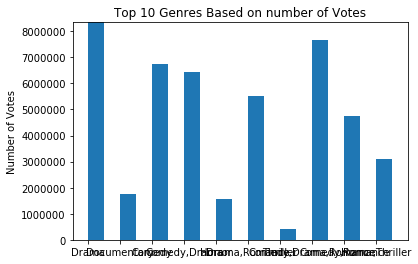

In [244]:
d = number_of_votes
X = np.arange(len(d))
plt.bar(X, d.values(), align='edge', width=0.5)
plt.xticks(X, d.keys())
ymax = max(d.values()) + 1
plt.ylim(0, ymax)
plt.title('Top 10 Genres Based on number of Votes')
plt.ylabel('Number of Votes' )
#plt.savefig("~/Desktop/myplot.png", dpi=150)
plt.show()

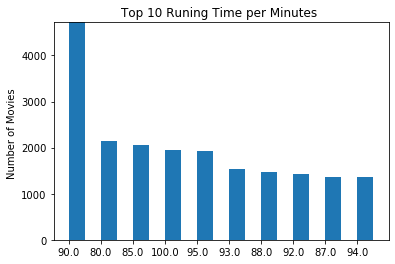

In [272]:
d = top_10_runtime
X = np.arange(len(d))
plt.bar(X, d.values(), align='edge', width=0.5)
plt.xticks(X, d.keys())
ymax = max(d.values()) + 1
plt.ylim(0, ymax)
plt.title('Top 10 Runing Time per Minutes ')
plt.ylabel('Number of Movies ' )
#plt.savefig("~/Desktop/myplot.png", dpi=150)
plt.show()

In [299]:
number_of_votes = [8342370, 1760862, 6763496, 6449680, 1570716, 5532458, 413778, 7662618, 4742223, 3102563]
number_of_votes

[8342370,
 1760862,
 6763496,
 6449680,
 1570716,
 5532458,
 413778,
 7662618,
 4742223,
 3102563]

In [220]:
sum_votes_HorrorThriller = new_imdb_HorrorThriller['numvotes'].sum()
sum_votes_HorrorThriller

3102563

In [221]:
sum_rate_nvots_HorrorThriller= new_imdb_HorrorThriller['rating*numvotes'].sum()
sum_rate_nvots_HorrorThriller

18509676.6

In [214]:
sum_votes_ComedyRomance = new_imdb_ComedyRomance['numvotes'].sum()
sum_votes_ComedyRomance

4742223

In [215]:
sum_rate_nvots_ComedyRomance= new_imdb_ComedyRomance['rating*numvotes'].sum()
sum_rate_nvots_ComedyRomance

29141244.6

In [208]:
sum_votes_ComedyDramaRomance = new_imdb_ComedyDramaRomance['numvotes'].sum()
sum_votes_ComedyDramaRomance

7662618

In [211]:
sum_rate_nvots_ComedyDramaRomance= new_imdb_ComedyDramaRomance['rating*numvotes'].sum()
sum_rate_nvots_ComedyDramaRomance

52260037.39999999

In [202]:
sum_votes_Thriller = new_imdb_Thriller['numvotes'].sum()
sum_votes_Thriller

431778

In [203]:
sum_votes_Thriller = new_imdb_Thriller['numvotes'].sum()
sum_votes_Thriller

2446084.3

In [198]:
sum_votes_DramaRomance = new_imdb_DramaRomance['numvotes'].sum()
sum_votes_DramaRomance

5532458

In [199]:
sum_rate_nvots_DramaRomance= new_imdb_DramaRomance['rating*numvotes'].sum()
sum_rate_nvots_DramaRomance

38705290.9

In [193]:
sum_votes_Horror = new_imdb_Horror['numvotes'].sum()
sum_votes_Horror

1570716

In [195]:
sum_votes_Horror = new_imdb_Horror['numvotes'].sum()
sum_votes_Horror

8571470.1

In [189]:
sum_votes_comdrama = new_imdb_Comdrama['numvotes'].sum()
sum_votes_comdrama

6449680

In [190]:
sum_rate_nvots_comdrama = new_imdb_Comdrama['rating*numvotes'].sum()
sum_rate_nvots_comdrama

44341030.0

In [184]:
sum_votes_comedy = new_imdb_Comedy['numvotes'].sum()
sum_votes_comedy

6763496

In [185]:
sum_rate_nvots_comedy = new_imdb_Comedy['rating*numvotes'].sum()
sum_rate_nvots_comedy

39745094.5

In [180]:
sum_votes_doc = new_imdb_Documentary['numvotes'].sum()
sum_votes_doc

1760862

In [181]:
sum_rate_nvots_doc = new_imdb_Documentary['rating*numvotes'].sum()
sum_rate_nvots_doc

12659994.7

In [247]:
top10_list

['Drama',
 'Documentary',
 'Comedy',
 'Comedy,Drama',
 'Horror',
 'Drama,Romance',
 'Thriller',
 'Comedy,Drama,Romance',
 'Comedy,Romance',
 'Horror,Thriller']

In [150]:
sum_votes = new_imdb_drama['numvotes'].sum()
sum_votes

8342370

In [151]:
sum_rate_nvots = new_imdb_drama['rating*numvotes'].sum()
sum_rate_nvots

59658708.39999999

In [245]:
just_average_drama = new_imdb[new_imdb['genres']=='Drama']['averagerating'].mean()
just_average_drama

6.485778781038375

In [246]:
just_average_Documentary = new_imdb[new_imdb['genres']=='Documentary']['averagerating'].mean()
just_average_Documentary

7.267045578751778

In [248]:
just_average_Comedy = new_imdb[new_imdb['genres']=='Comedy']['averagerating'].mean()
just_average_Comedy

5.785490877497828

In [249]:
just_average_ComedyDrama = new_imdb[new_imdb['genres']=='Comedy,Drama']['averagerating'].mean()
just_average_ComedyDrama

6.36891064871481

In [250]:
just_average_Horror = new_imdb[new_imdb['genres']=='Horror']['averagerating'].mean()
just_average_Horror

4.685573476702508

In [251]:
just_average_DramaRomance = new_imdb[new_imdb['genres']=='Drama,Romance']['averagerating'].mean()
just_average_DramaRomance

6.271695402298851

In [252]:
just_average_Thriller= new_imdb[new_imdb['genres']=='Thriller']['averagerating'].mean()
just_average_Thriller

5.603726708074534

In [253]:
just_average_ComedyDramaRomance = new_imdb[new_imdb['genres']=='Comedy,Drama,Romance']['averagerating'].mean()
just_average_ComedyDramaRomance

6.288869715271787

In [254]:
just_average_ComedyRomance = new_imdb[new_imdb['genres']=='Comedy,Romance']['averagerating'].mean()
just_average_ComedyRomance

5.849113475177305

In [255]:
just_average_HorrorThriller = new_imdb[new_imdb['genres']=='Horror,Thriller']['averagerating'].mean()
just_average_HorrorThriller

4.746023329798516

In [256]:
average_rate_only = dict({'Drama': 6.48,
 'Documentary': 7.26,
 'Comedy': 5.78,
 'Comedy,Drama': 6.36,
 'Horror': 4.68,
 'Drama,Romance': 6.27,
 'Thriller': 5.60,
 'Comedy,Drama,Romance': 6.28,
 'Comedy,Romance': 5.84,
 'Horror,Thriller': 4.74})

In [289]:
average_rate_list = [6.48, 7.26, 5.78, 6.36, 4.68, 6.27, 5.60, 6.28, 5.84, 4.74]
average_rate_list

[6.48, 7.26, 5.78, 6.36, 4.68, 6.27, 5.6, 6.28, 5.84, 4.74]

In [257]:
average_rate_only

{'Drama': 6.48,
 'Documentary': 7.26,
 'Comedy': 5.78,
 'Comedy,Drama': 6.36,
 'Horror': 4.68,
 'Drama,Romance': 6.27,
 'Thriller': 5.6,
 'Comedy,Drama,Romance': 6.28,
 'Comedy,Romance': 5.84,
 'Horror,Thriller': 4.74}

In [263]:
genres_with_numberofvote

{'Drama': 7.15,
 'Documentary': 7.18,
 'Comedy': 5.87,
 'Comedy,Drama': 6.87,
 'Horror': 5.45,
 'Drama,Romance': 6.99,
 'Thriller': 5.66,
 'Comedy,Drama,Romance': 6.82,
 'Comedy,Romance': 6.14,
 'Horror,Thriller': 5.96}

In [279]:
top10_list_numvotes = [7.15, 7.18, 5.87, 6.87, 5.45, 6.99, 5.66, 6.82, 6.14, 5.96]

In [270]:
new_runtime = new_imdb['runtime_minutes'].value_counts()
new_runtime.head(10)

90.0     4718
80.0     2142
85.0     2048
100.0    1954
95.0     1919
93.0     1533
88.0     1476
92.0     1423
87.0     1373
94.0     1369
Name: runtime_minutes, dtype: int64

In [271]:
top_10_runtime = dict({90.0: 4718, 80.0: 2142, 85.0: 2048, 100.0: 1954, 95.0: 1919, 93.0: 1533, 88.0: 1476, 92.0: 1423, 87.0: 1373, 94.0: 1369 })
top_10_runtime

{90.0: 4718,
 80.0: 2142,
 85.0: 2048,
 100.0: 1954,
 95.0: 1919,
 93.0: 1533,
 88.0: 1476,
 92.0: 1423,
 87.0: 1373,
 94.0: 1369}

In [164]:
def runing_time_in_minutes(new_imdb):
    """
    This function makes movies in 4 categories 
    by length to see what category has the most rating
    
    Less than 40 minutes: 'Short'
    40 to 80 minutes: 'Medium'
    80 to 120 minutes: 'Long'
    more than 120 minutes: 'Super Long'
    
    """
    for runtime_minutes in new_imdb:
        if runtime_minutes <= 40.0:
            return 'Short'
        elif 40.0<runtime_minutes<80.0:
            return 'Medium'
        elif 80.0<runtime_minutes<120.0:
            return 'Long'
        else:
            return 'Super long'

In [166]:
print(runing_time_in_minutes)

<function runing_time_in_minutes at 0x7f8d1b65d9d8>


In [282]:
top10_list_numvotes

[7.15, 7.18, 5.87, 6.87, 5.45, 6.99, 5.66, 6.82, 6.14, 5.96]

In [278]:
top10_list

['Drama',
 'Documentary',
 'Comedy',
 'Comedy,Drama',
 'Horror',
 'Drama,Romance',
 'Thriller',
 'Comedy,Drama,Romance',
 'Comedy,Romance',
 'Horror,Thriller']

In [284]:
new_df_genres = pd.DataFrame({'Genres': top10_list, 'VotesRating': top10_list_numvotes})

In [285]:
new_df_genres

,Genres,VotesRating
0,Drama,7.15
1,Documentary,7.18
2,Comedy,5.87
3,"Comedy,Drama",6.87
4,Horror,5.45
5,"Drama,Romance",6.99
6,Thriller,5.66
7,"Comedy,Drama,Romance",6.82
8,"Comedy,Romance",6.14
9,"Horror,Thriller",5.96


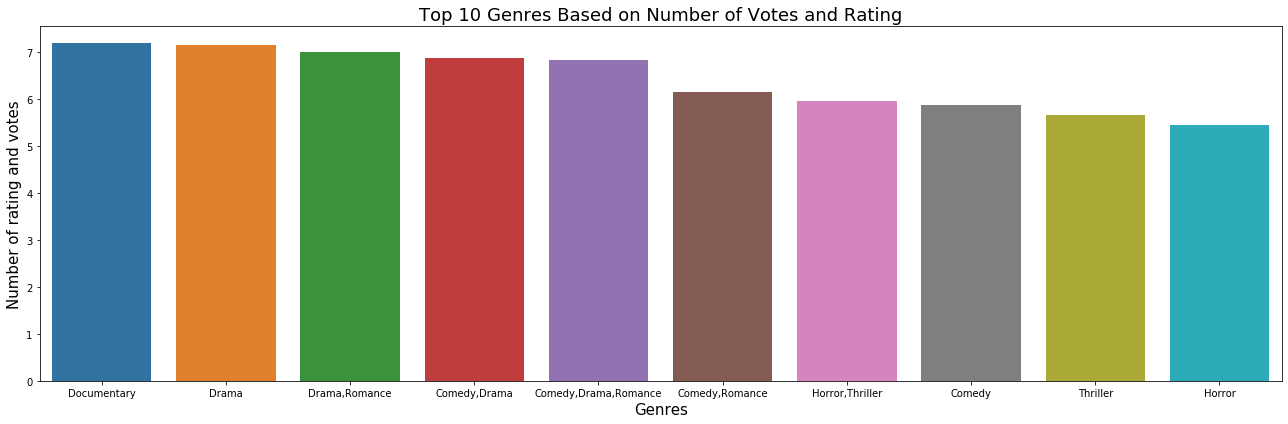

In [320]:
plt.figure(figsize=(18,6))
# make barplot and sort bars in descending order
sns.barplot(x='Genres', y='VotesRating', data=new_df_genres, 
            order=new_df_genres.sort_values('VotesRating',ascending = False).Genres)
# set labels
plt.xlabel("Genres", size=15)
plt.ylabel("Number of rating and votes", size=15)
plt.title("Top 10 Genres Based on Number of Votes and Rating", size=18)
plt.tight_layout()
#plt.savefig( , dpi=100)


In [292]:
new_df_genres_onlyRate = pd.DataFrame({'Genres': top10_list, 'OnlyRate': average_rate_list})
new_df_genres_onlyRate

,Genres,OnlyRate
0,Drama,6.48
1,Documentary,7.26
2,Comedy,5.78
3,"Comedy,Drama",6.36
4,Horror,4.68
5,"Drama,Romance",6.27
6,Thriller,5.60
7,"Comedy,Drama,Romance",6.28
8,"Comedy,Romance",5.84
9,"Horror,Thriller",4.74


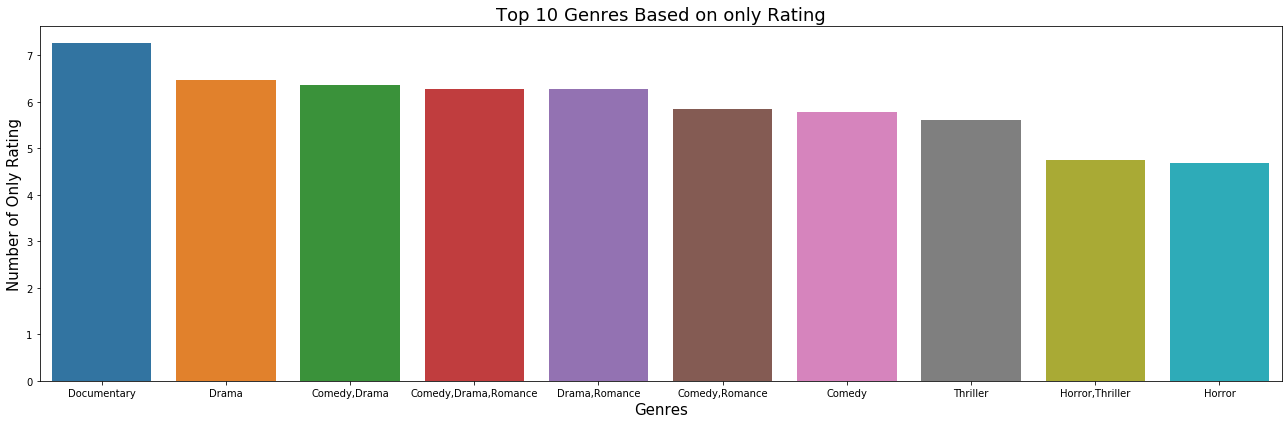

In [319]:
plt.figure(figsize=(18,6))
# make barplot and sort bars in descending order
sns.barplot(x='Genres', y='OnlyRate', data=new_df_genres_onlyRate, 
            order=new_df_genres_onlyRate.sort_values('OnlyRate',ascending = False).Genres)
# set labels
plt.xlabel("Genres", size=15)
plt.ylabel("Number of Only Rating", size=15)
plt.title("Top 10 Genres Based on only Rating", size=18)
plt.tight_layout()
#plt.savefig( , dpi=100)

In [300]:
number_of_votes

[8342370,
 1760862,
 6763496,
 6449680,
 1570716,
 5532458,
 413778,
 7662618,
 4742223,
 3102563]

In [301]:
new_df_number_of_votes = pd.DataFrame({'Genres': top10_list, 'NumVotes': number_of_votes })
new_df_number_of_votes

,Genres,NumVotes
0,Drama,8342370
1,Documentary,1760862
2,Comedy,6763496
3,"Comedy,Drama",6449680
4,Horror,1570716
5,"Drama,Romance",5532458
6,Thriller,413778
7,"Comedy,Drama,Romance",7662618
8,"Comedy,Romance",4742223
9,"Horror,Thriller",3102563


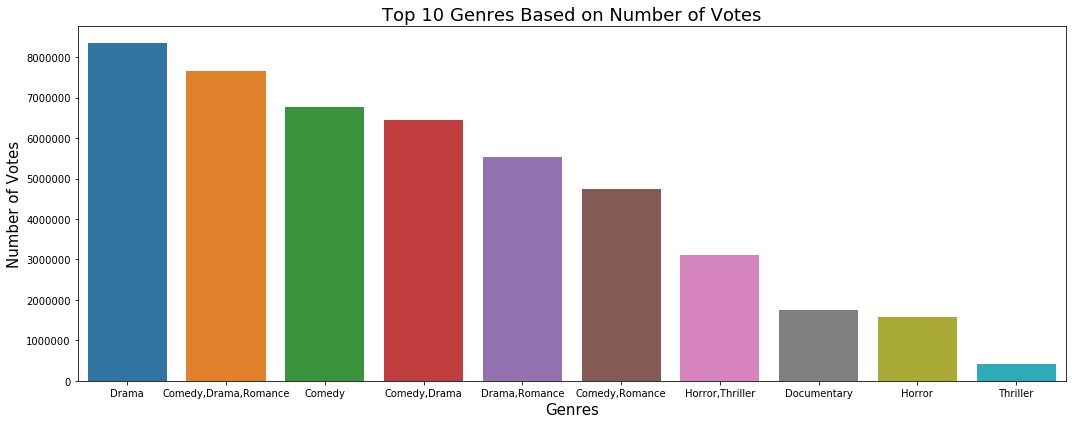

In [317]:
plt.figure(figsize=(15,6))
# make barplot and sort bars in descending order
sns.barplot(x='Genres', y='NumVotes', data=new_df_number_of_votes, 
            order=new_df_number_of_votes.sort_values('NumVotes',ascending = False).Genres)
# set labels
plt.xlabel("Genres", size=15)
plt.ylabel("Number of Votes", size=15)
plt.title("Top 10 Genres Based on Number of Votes", size=18)
plt.tight_layout()
#plt.savefig( , dpi=100)

In [311]:
top_10_runtime

{90.0: 4718,
 80.0: 2142,
 85.0: 2048,
 100.0: 1954,
 95.0: 1919,
 93.0: 1533,
 88.0: 1476,
 92.0: 1423,
 87.0: 1373,
 94.0: 1369}

In [313]:
new_df_runtime = pd.DataFrame(top_10_runtime.items(), columns=['Runtime', 'Number of Movie'])
new_df_runtime

,Runtime,Number of Movie
0,90.0,4718
1,80.0,2142
2,85.0,2048
3,100.0,1954
4,95.0,1919
5,93.0,1533
6,88.0,1476
7,92.0,1423
8,87.0,1373
9,94.0,1369


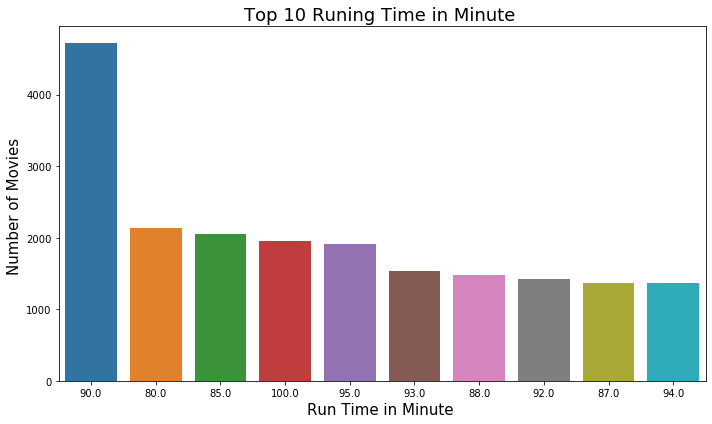

In [321]:
plt.figure(figsize=(10,6))
# make barplot and sort bars in descending order
sns.barplot(x='Runtime', y='Number of Movie', data=new_df_runtime, 
            order=new_df_runtime.sort_values('Number of Movie',ascending = False).Runtime)
# set labels
plt.xlabel("Run Time in Minute ", size=15)
plt.ylabel("Number of Movies ", size=15)
plt.title("Top 10 Runing Time in Minute ", size=18)
plt.tight_layout()
#plt.savefig( '', dpi=100)

In [322]:
top_20_genres = new_imdb['genres'].value_counts()[:20]
top_20_genres

Drama                            10189
Documentary                       9149
Comedy                            4604
Comedy,Drama                      2451
Horror                            2232
Drama,Romance                     1392
Thriller                          1288
Comedy,Drama,Romance              1159
Comedy,Romance                    1128
Horror,Thriller                    943
Drama,Thriller                     938
Action                             721
Biography,Documentary              675
Documentary,Drama                  572
Documentary,Music                  544
Action,Crime,Drama                 530
Romance                            529
Comedy,Horror                      515
Crime,Drama,Thriller               493
Biography,Documentary,History      476
Name: genres, dtype: int64

In [324]:
new_df_20_genres = pd.DataFrame(top_20_genres.items(), columns=['Genres', 'Number of Rating'])
new_df_20_genres

,Genres,Number of Rating
0,Drama,10189
1,Documentary,9149
2,Comedy,4604
3,"Comedy,Drama",2451
4,Horror,2232
5,"Drama,Romance",1392
6,Thriller,1288
7,"Comedy,Drama,Romance",1159
8,"Comedy,Romance",1128
9,"Horror,Thriller",943
